
# Using display.specshow

This notebook gives a more in-depth demonstration of all things that `specshow`
can do to help generate beautiful visualizations of spectro-temporal data.


In [1]:
# Code source: Brian McFee
# License: ISC
# sphinx_gallery_thumbnail_number = 6

All of librosa's plotting functions rely on matplotlib.
To demonstrate everything we can do, it will help to
import matplotlib's pyplot API here.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

import librosa

First, we'll load in a demo track



In [3]:
y, sr = librosa.load(librosa.ex('trumpet'))

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


The first thing we might want to do is display an ordinary
(linear) spectrogram.
We'll do this by first computing the short-time Fourier
transform, and then mapping the magnitudes to a decibel
scale.




In [4]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

If you're familiar with matplotlib already, you may know
that there are two ways of using it: the `pyplot` interface
and the object-oriented interface.
Both are supported by librosa, as we'll show here.

First, the pyplot interface:



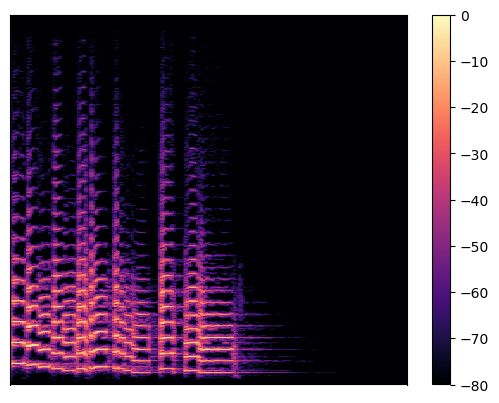

In [5]:
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

And now the object-oriented interface



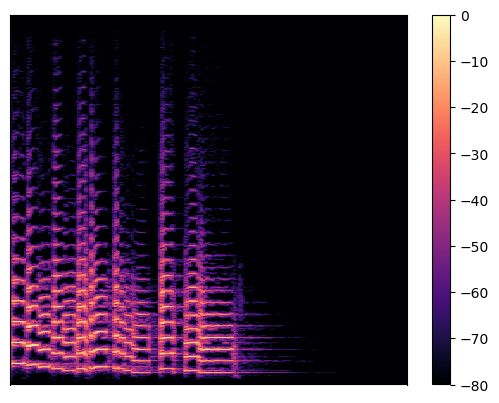

In [6]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, ax=ax)
fig.colorbar(img, ax=ax)

Both figures are identical, but they use different programming
interfaces to construct.  Most people find the pyplot interface
to be quicker to learn, but the object-oriented interface can
be a little more flexible for complex figures.

For the remainder of this example, we'll use the object-oriented
interface.



## Decorating your plot
The figure above conveys the basic content of the spectrogram,
but it's missing axis labels. Without that information, it's
impossible for a reader to know how to interpret the visualization.

specshow provides many helpers to automatically decorate the axes
of your plot.  For the plot above, our x-axis corresponds to time,
and our y-axis corresponds to linearly spaced frequencies produced
by the discrete Fourier transform.
We can tell specshow to decorate the axes accordingly:



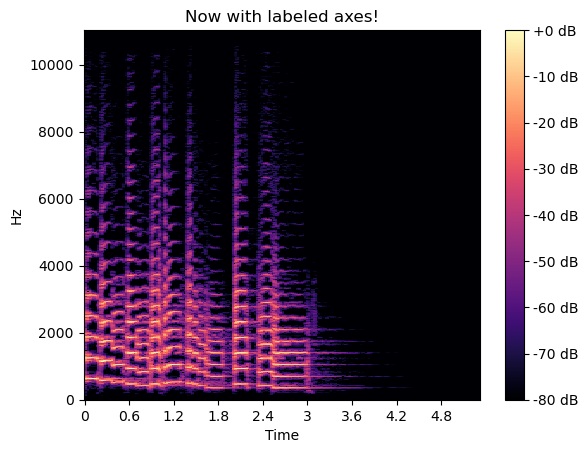

In [7]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")

This is much better already!  Note that we also added a format string
to the colorbar, so readers know how to read the color scale.



## Changing axis scales
The linear frequency scale is sometimes helpful, but often it can
difficult to read.  Alternatively, it is common to use a logarithmic
frequency axis.  This has the benefit that every octave occupies
a constant vertical extent.

We can tell specshow to use log-scaled frequency axes just as above:



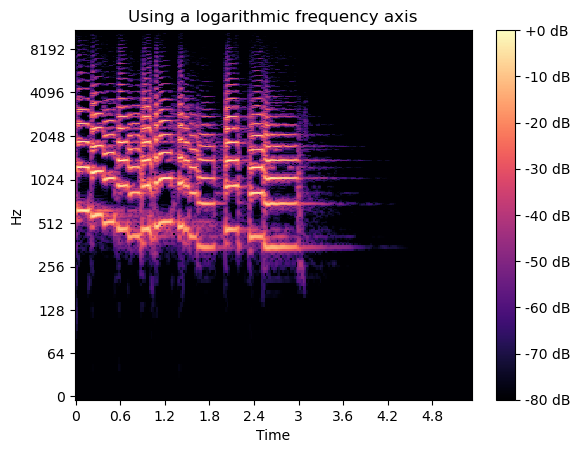

In [8]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")


## Changing the analysis parameters
The default parameter settings used by librosa (e.g., `sr=22050`, `hop_length=512`,
etc) may not be appropriate for every signal.
If you change a parameter from its default value, e.g. when computing an STFT,
you can pass that same parameter to `specshow`.
This ensures that axis scales (e.g. time or frequency) are computed correctly.



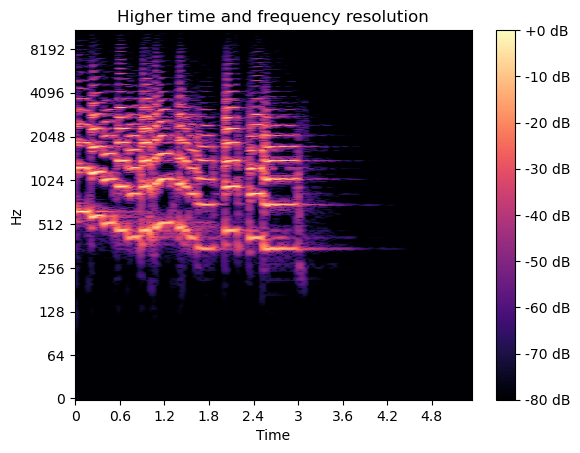

In [9]:
fig, ax = plt.subplots()
D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

Note that only the parameters which are strictly necessary are supported by
`specshow`.  For example, without the `hop_length`, we wouldn't know how to
translate frame indices to time indices.

A full list of the supported parameters is provided in the
`librosa.display.specshow` documentation.



## Other types of spectral data
The examples above illustrate how to plot linear spectrograms,
but librosa provides many kinds of spectral representations:
Mel-scaled, constant-Q, variable-Q, chromagrams, tempograms, etc.

specshow can plot these just as well.  For example, a Mel spectrogram
can be displayed as follows:



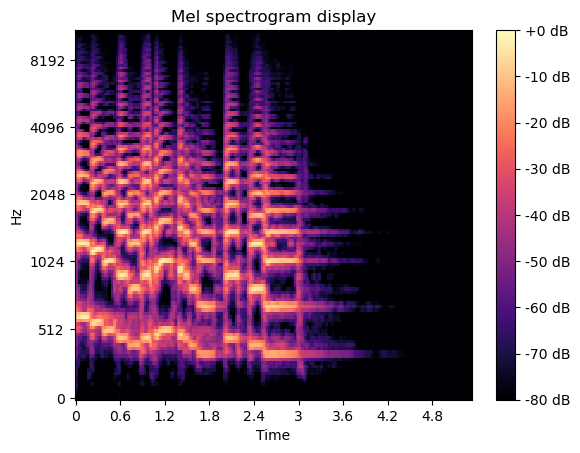

In [10]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

Constant-Q plots, and other logarithmically scaled frequency representations
such as Variable-Q or `iirt` can be decorated using either the frequencies (Hz)
or their note names in scientific pitch notation:



[Text(0.5, 1.0, 'Pitch axis decoration')]

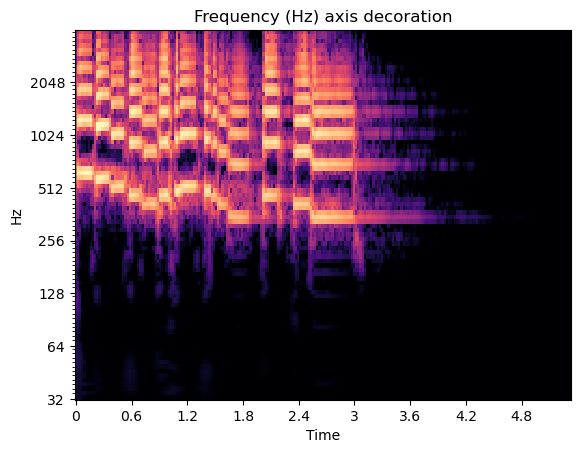

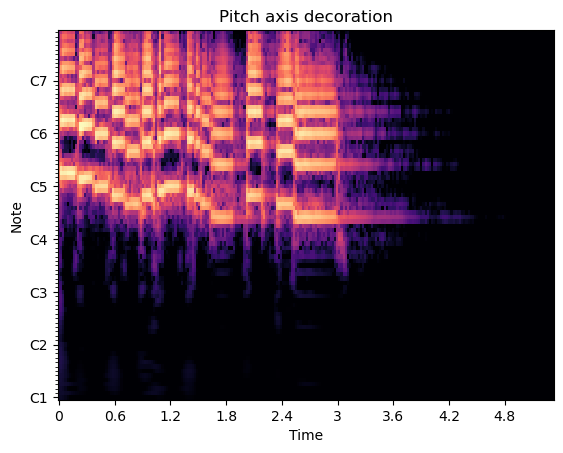

In [11]:
C = librosa.cqt(y=y, sr=sr)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_hz', x_axis='time', ax=ax)
ax.set(title='Frequency (Hz) axis decoration')

fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_note', x_axis='time', ax=ax)
ax.set(title='Pitch axis decoration')

In the latter case, the underlying data representation is still measured in
Hz; only the tick labels are changed.



Chroma representations don't have a fixed frequency axis, and instead aggregate
information across all frequencies corresponding to a given pitch class.
specshow can plot these too:



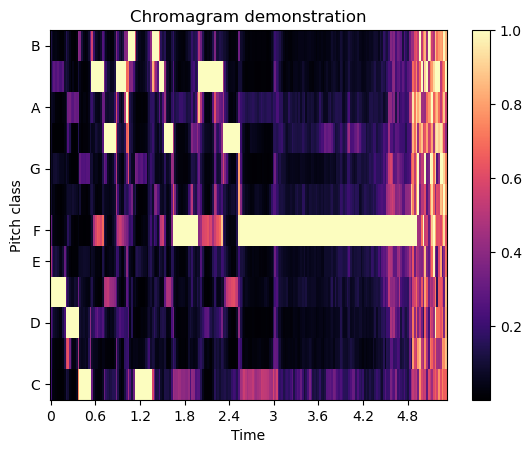

In [12]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

If you also happen to know the key or mode of the piece being analyzed, you can
pass this to specshow and it will spell the notes properly:



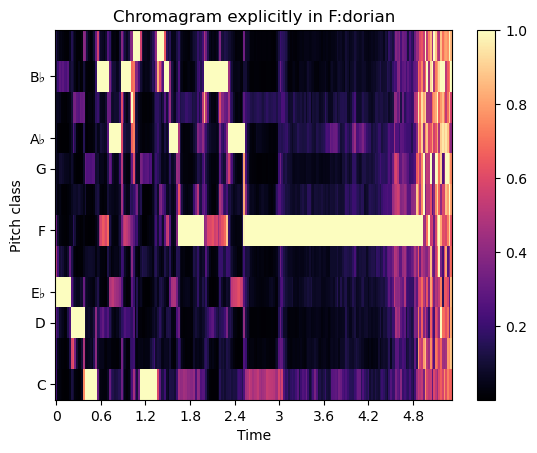

In [13]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time',
                               key='F:dorian', ax=ax)
ax.set(title='Chromagram explicitly in F:dorian')
fig.colorbar(img, ax=ax)

This will also work for 'cqt_note' mode.



## Indian notation systems



In [14]:
# The examples above use Western music notation to identify pitch classes, but we can
# also decorate axes with either Hindustani or Carnatic svara classes.
#
# These are specified by using `y_axis='chroma_h'` or `'chroma_c'`, respectively.
#
# Just as with key identification in the chroma example above, you can specify the
# thaat (Hindustani) or melakarta number or name (Carnatic) to notate the plot.

For example, the example above is in Eb:maj (or, more accurately, F:dorian),
which we can also represent in Hindustani notation as Sa=5 (F) and 'kafi' thaat:



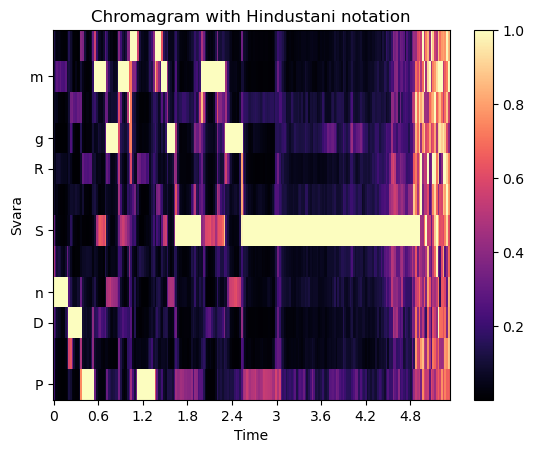

In [15]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma_h', x_axis='time',
                               Sa=5, thaat='kafi', ax=ax)
ax.set(title='Chromagram with Hindustani notation')
fig.colorbar(img, ax=ax)

In Carnatic notation, we would use melakarta #22.
Note: `thaat` is optional for Hindustani notation, but `mela` is required for
Carnatic.



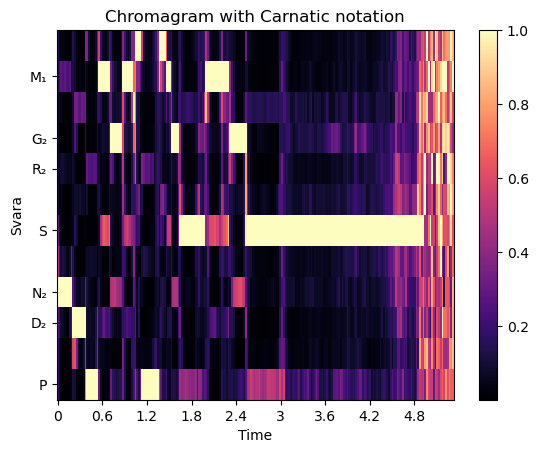

In [16]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma_c', x_axis='time',
                               Sa=5, mela=22, ax=ax)
ax.set(title='Chromagram with Carnatic notation')
fig.colorbar(img, ax=ax)

These notation schemes can also be used in cqt plots by specifying
`y_axis='cqt_svara'`.

In this mode, `Sa` must be specified in Hz.  Carnatic notation is used
if `mela` is provided, and Hindustani is used if not.

Individual svara are only notated if the display range is sufficiently small,
so we'll zoom into a single octave for this example.



[Text(0.5, 1.0, 'Carnatic decoration'), (349.2282314330039, 698.4564628660078)]

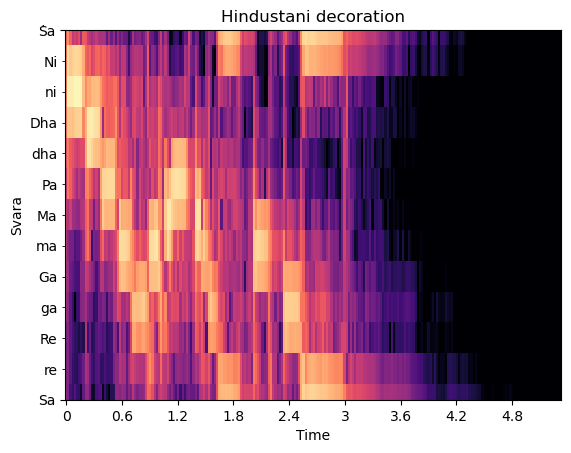

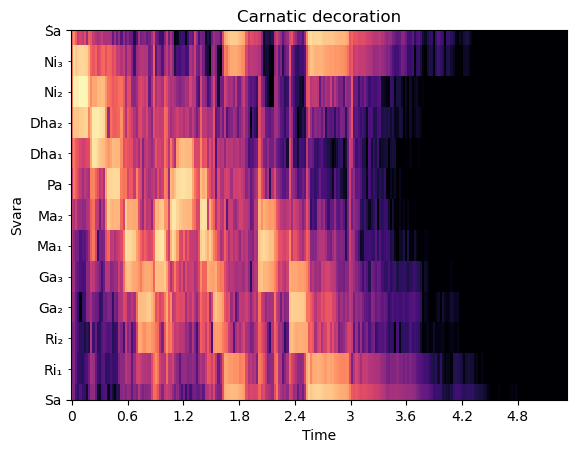

In [17]:
Sa = librosa.note_to_hz('F4')
fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_svara', Sa=Sa, x_axis='time', ax=ax)
ax.set(title='Hindustani decoration',
       ylim=[Sa, 2*Sa])

fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_svara', Sa=Sa, mela=22, x_axis='time', ax=ax)
ax.set(title='Carnatic decoration',
       ylim=[Sa, 2*Sa])

## Non-spectral data
specshow can also be used for data that isn't exactly spectro-temporal.
One common application is recurrence (self-similarity) plots, which
are time-by-time, as illustrated below.



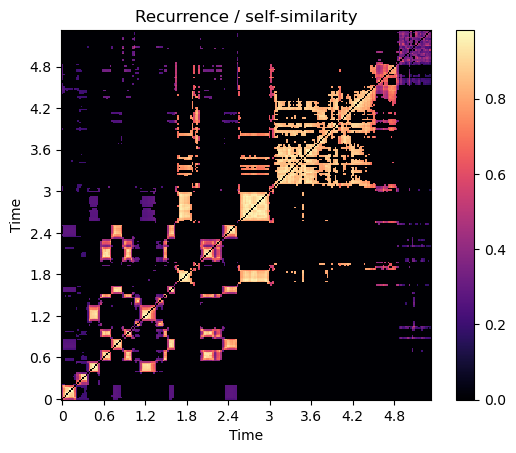

In [18]:
R = librosa.segment.recurrence_matrix(chroma, mode='affinity')
fig, ax = plt.subplots()
img = librosa.display.specshow(R, y_axis='time', x_axis='time', ax=ax)
ax.set(title='Recurrence / self-similarity')
fig.colorbar(img, ax=ax)

In this example, notice that we used 'time' for both axis labels.
In general, any of the supported modes can be used for either axis.
For example, we could also plot the chroma covariance plot with
chroma decorations on each axis:



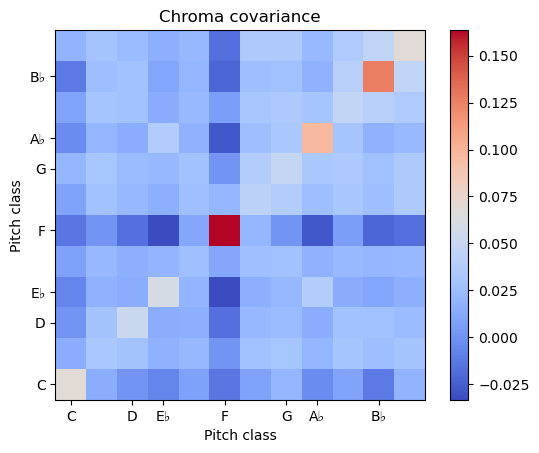

In [19]:
ccov = np.cov(chroma)
fig, ax = plt.subplots()
img = librosa.display.specshow(ccov, y_axis='chroma', x_axis='chroma',
                               key='Eb:maj', ax=ax)
ax.set(title='Chroma covariance')
fig.colorbar(img, ax=ax)

Certain plots (e.g. covariance, self-similarity) are automatically
squared by `specshow`. To override that, pass `auto_scale=False`.



## Color maps
You may have noticed that the color mappings for the images above
were selected automatically by `specshow`.
This is done by `librosa.display.cmap` according to the following heuristic:

  - If the data is boolean, use black-and-white
  - If the data is (mostly) positive or (mostly) negative, use a sequential
    colormap
  - If the data contains both positive and negative values, use a diverging
    colormap.

The default sequential colormap is 'magma', which is perceptually uniform and
converts gracefully to grayscale.

You can always override this automatic colormap selection by setting an
explicit `cmap`:



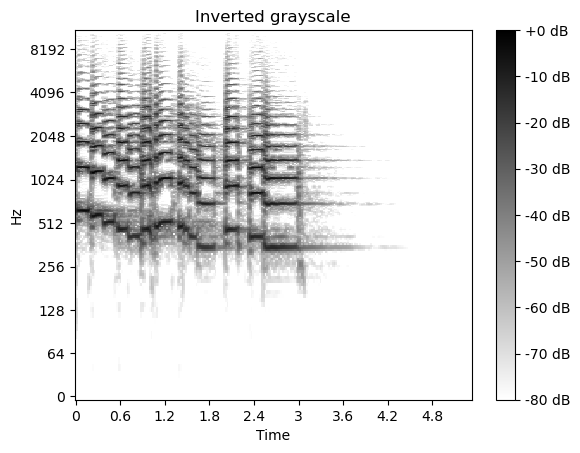

In [20]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, cmap='gray_r', y_axis='log', x_axis='time', ax=ax)
ax.set(title='Inverted grayscale')
fig.colorbar(img, ax=ax, format="%+2.f dB")

`specshow` uses `matplotlib.pyplot.pcolormesh` to generate the underlying image.
Any parameters to `pcolormesh` can be passed through from `specshow`, for example,
to set explicit bounds on the minimum and maximum ranges for colors.
This can be helpful when centering divergent colormaps around 0 (or some other
reference point).



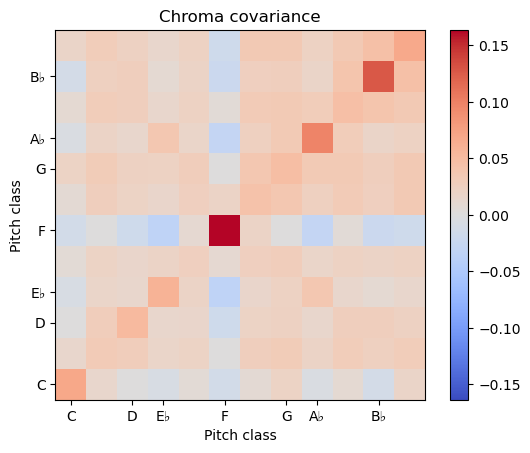

In [21]:
max_var = np.max(np.abs(ccov))
fig, ax = plt.subplots()
img = librosa.display.specshow(ccov, vmin=-max_var, vmax=max_var,
                               y_axis='chroma', x_axis='chroma',
                               key='Eb:maj', ax=ax)
ax.set(title='Chroma covariance')
fig.colorbar(img, ax=ax)

## Multiple plots
Often, we'll want to show multiple synchronized features simultaneously.
This can be done using matplotlib's `subplot` mechanism and sharing axes.
There are many examples of this throughout the librosa documentation, but
here we'll go through it step by step.



[(1.0, 3.0)]

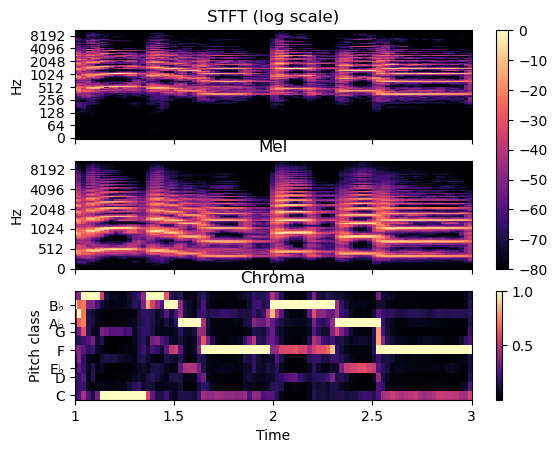

In [22]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', 
                                key='Eb:maj', ax=ax[2])
ax[2].set(title='Chroma')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])

# Or have individual colorbars:
fig.colorbar(img3, ax=[ax[2]])

# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3

## Non-uniform axes
All of the examples so far have used either uniformly, linearly, or geometrically
spaced axes.  But sometimes, we have non-uniform sampling of data, and we'd like
to plot it in natural coordinates.

One example of this is when using beat-synchronous features in the common case
where the tempo is not exactly fixed.  To demonstrate this, we'll use a longer
example clip.

To specify non-uniform axis sampling, you will need to provide the `x_coords`
(or `y_coords`) array indicating the position of each sample, as demonstrated
below.



[(10.0, 25.0)]

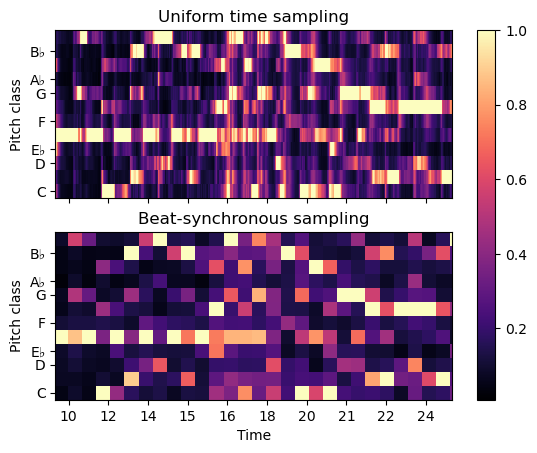

In [24]:
y, sr = librosa.load(librosa.ex('nutcracker'))
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# beats contains the frame indices of each detected beat
# for synchronization and visualization, we'll need to expand this
# to cover the limits of the data.  This can be done as follows:
beats = librosa.util.fix_frames(beats, x_min=0)

# Now beat-synchronize the chroma features
chroma_sync = librosa.util.sync(chroma, beats, aggregate=np.median)

# For visualization, we can convert to time (in seconds)
beat_times = librosa.frames_to_time(beats)

# We'll plot the synchronized and unsynchronized features next
# to each other

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[0],
                               key='Eb:maj')
ax[0].set(title='Uniform time sampling')
ax[0].label_outer()

librosa.display.specshow(chroma_sync, y_axis='chroma', x_axis='time',
                         x_coords=beat_times, ax=ax[1], key='Eb:maj')
ax[1].set(title='Beat-synchronous sampling')
fig.colorbar(img, ax=ax)

# For clarity, we'll zoom in on a 15-second patch
ax[1].set(xlim=[10, 25])

## Conclusion
This series of examples demonstrates most of the functionality of
`librosa.display.specshow`, but it does not exhaustively show
every option, e.g., for axis decoration.
Interested readers should look through the rest of the API
documentation to see how these other options can be used
effectively.

